# Proyecto B
## Rodolfo Martínez Vega

https://github.com/dragonnomada/machine-learning-projects

## I. Adquisición, limpieza y estructuración de las muestras

In [1]:
import numpy as np
import pandas as pd
import re
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree

def simbolo_a_numero(simbolo):
    if simbolo == "-":
        return 0
    elif simbolo == "x" or simbolo == "p*" or simbolo == "c*" or simbolo == "a*" or simbolo == "t*" or simbolo == "d*" or simbolo == "r*":
        return -1
    elif simbolo == "p+":
        return 1
    elif simbolo == "c+":
        return 2
    elif simbolo == "a+":
        return 3
    elif simbolo == "t+":
        return 4
    elif simbolo == "d+":
        return 5
    elif simbolo == "r+":
        return 6


def etiqueta_a_vector(etiqueta):
    if etiqueta == "LUU":
        return [1, 0, 0, 0, 0, 0, 0, 0]
    elif etiqueta == "LLU":
        return [0, 1, 0, 0, 0, 0, 0, 0]
    elif etiqueta == "LLD":
        return [0, 0, 1, 0, 0, 0, 0, 0]
    elif etiqueta == "LDD":
        return [0, 0, 0, 1, 0, 0, 0, 0]
    elif etiqueta == "RDD":
        return [0, 0, 0, 0, 1, 0, 0, 0]
    elif etiqueta == "RRD":
        return [0, 0, 0, 0, 0, 1, 0, 0]
    elif etiqueta == "RRU":
        return [0, 0, 0, 0, 0, 0, 1, 0]
    elif etiqueta == "RUU":
        return [0, 0, 0, 0, 0, 0, 0, 1]

def remove_blank_spaces(string):
    pattern = re.compile(r'\s+')
    return re.sub(pattern, '', string)

# 1. Abre el archivo "knight-moves.txt"
f = open("datasets/knight-moves.txt")

simbolos = []
etiquetas = []

# 2. Recorre cada linea
for line in f:
    # 3. Separa la línea por espacios
    parts = line.split(" ")
    # 4. Obtén los primero 8 símbolos y la etiqueta
    cells = parts[:8]
    # 5. Convierte los primeros 8 símbolos en un vector que codifique los símbolos de la siguiente manera
    cells_to_symbol = list(map(simbolo_a_numero, cells))
    label = remove_blank_spaces(parts[8])
    # 6. Para clasificador por Árboles de Decisión y Soporte Vectorial. Convierte la etiqueta en un valor codificado
    labels_to_vector = etiqueta_a_vector(label)

    simbolos.append(cells_to_symbol)
    etiquetas.append(labels_to_vector)

f.close()

# 7. Guarda cada muestra "x" en "X" y cada etiqueta "y" en "Y"
X = np.array([np.array(xi) for xi in simbolos])

Y = np.array(etiquetas)


## II. Preparación de las muestras

In [2]:
# 1. Separa las muestras en "X_train", "X_test", "Y_train", "Y_test" con sklearn.model_selection.train_test_split(X, Y)

# test_size = If float, should be between 0.0 and 1.0 and represent the proportion of the dataset to include in the test split.
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

## III. Clasificación de las muestras

In [3]:
# 1. Crea un clasificador por Árbol de Decisión con sklearn.tree.DecisionTreeClassifier
clf = DecisionTreeClassifier()

clf.fit(X_train, y_train)

# 2. Muestra el score para X_test, Y_test
score = clf.score(X_test, y_test)
print("score: ", score)

score:  0.9903030303030304


927, 176.20137931034483, 'X[1] <= 4.5\ngini = 0.179\nsamples = 301\nvalue = [[277, 24]\n[267, 34]\n[269, 32]\n[274, 27]\n[154, 147]\n[292, 9]\n[291, 10]\n[283, 18]]'),
 Text(241.2329268292683, 168.70344827586206, 'X[2] <= 4.5\ngini = 0.161\nsamples = 261\nvalue = [[238, 23]\n[261, 0]\n[231, 30]\n[237, 24]\n[114, 147]\n[252, 9]\n[251, 10]\n[243, 18]]'),
 Text(236.12926829268295, 161.2055172413793, 'X[3] <= 4.5\ngini = 0.138\nsamples = 227\nvalue = [[207, 20]\n[227, 0]\n[227, 0]\n[204, 23]\n[80, 147]\n[218, 9]\n[217, 10]\n[209, 18]]'),
 Text(232.7268292682927, 153.70758620689656, 'X[7] <= 3.5\ngini = 0.11\nsamples = 200\nvalue = [[184, 16]\n[200, 0]\n[200, 0]\n[200, 0]\n[53, 147]\n[191, 9]\n[190, 10]\n[182, 18]]'),
 Text(230.0048780487805, 146.2096551724138, 'X[0] <= 4.5\ngini = 0.08\nsamples = 180\nvalue = [[166, 14]\n[180, 0]\n[180, 0]\n[180, 0]\n[33, 147]\n[171, 9]\n[170, 10]\n[180, 0]]'),
 Text(228.6439024390244, 138.71172413793101, 'X[6] <= 3.5\ngini = 0.052\nsamples = 166\nvalue = 

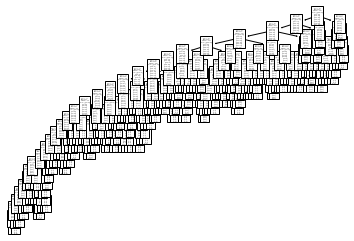

In [4]:
# 3. Pinta el árbol generado usando sklearn.tree.plot_tree
plot_tree(clf)

## IV. Validación

In [5]:
def interpretar_vector(vector):
    if np.array_equal(vector, [[1, 0, 0, 0, 0, 0, 0, 0]]):
        return "LUU"
    elif np.array_equal(vector, [[0, 1, 0, 0, 0, 0, 0, 0]]):
        return "LLU"
    elif np.array_equal(vector, [[0, 0, 1, 0, 0, 0, 0, 0]]):
        return "LLD"
    elif np.array_equal(vector, [[0, 0, 0, 1, 0, 0, 0, 0]]):
        return "LDD"
    elif np.array_equal(vector, [[0, 0, 0, 0, 1, 0, 0, 0]]):
        return "RDD"
    elif np.array_equal(vector, [[0, 0, 0, 0, 0, 1, 0, 0]]):
        return "RRD"
    elif np.array_equal(vector, [[0, 0, 0, 0, 0, 0, 1, 0]]):
        return "RRU"
    elif np.array_equal(vector, [[0, 0, 0, 0, 0, 0, 0, 1]]):
        return "RUU"
    else:
        return "Desconocido"

def get_simbolo(simbolo):
    if simbolo == -1:
        return "*"
    elif simbolo == 0:
        return "-"
    elif simbolo == 1:
        return "p+"
    elif simbolo == 2:
        return "c+"
    elif simbolo == 3:
        return "a+"
    elif simbolo == 4:
        return "t+"
    elif simbolo == 5:
        return "d+"
    elif simbolo == 6:
        return "r+"
    else:
        return "Desconocido"

def interpretar_simbolo(x):
    r = list(map(get_simbolo, x))
    return r


yp = []
yp_list = []
x_list = []
y_list = []

corrects = 0
fails = 0

# Elimina el archivo si existe
try:
    os.remove("knight-moves-predict.txt")
except OSError:
    pass

# Crea un archivo en blanco
f = open("knight-moves-predict.txt", "w") 

# 1. Recorre cada muestra X_test, Y_test
for index, x in enumerate(X_test):
    # 2. Para cada muestra "x", "y" predice la etiqueta "yp" según el clasificador.
    yp = clf.predict([x])

    # 3. Codifica el vector "x" de forma inversa => -1: *, 0: -, 1: p+, 2: c+, 3: a+, 4: t+, 5: d+, 6: r+.
    x_codificado = interpretar_simbolo(x)

    # 4. Codifica la etiqueta "y" y "yp" de forma inversa: [1, 0, 0, 0, 0, 0, 0, 0]: LUU, ...
    y = y_test[index]
    y_codificado = interpretar_vector(np.array([y]))
    yp_codificado = interpretar_vector(yp)

    # 5. Imprime una línea con la codificación de "x", "y" y "yp" separados por un espacio.
    linea = f"{x_codificado} {y_codificado} {yp_codificado}\n"

    # 6. Escribe un archivo llamado "knight-moves-predict.txt" con cada línea.
    f.write(linea)

    # 8. Cuenta los "corrects" y los "fails"
    if y_codificado == yp_codificado:
        corrects += 1
    else:
        fails += 1

# 7. Escribe al final de la línea: Score: {score}
f.write(f"Score: {score}\n")

# 9. Escribe después del score una línea con Corrects: {corrects}, Fails: {fails}, Total: {total}.
total = corrects + fails
f.write(f"Corrects: {corrects}, Fails: {fails}, Total: {total}\n")

# 10. Calcula el porcentaje de "corrects" y el porcentaje de "fails".
porcentaje_corrects = (corrects / total) * 100
porcentaje_fails = (fails / total) * 100

# 11. Escribe en una línea al final {pct_corrects} / {pct_fails}
f.write(f"porcentaje_corrects / porcentaje_fails: {porcentaje_corrects} % / {porcentaje_fails} %")

# Cerrar archivo
f.close()

print("¡Archivo creado!")





¡Archivo creado!
